In [18]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

# 1. Prepare the data:

In [19]:
data = genfromtxt('advertising.csv', delimiter=',', skip_header=1)

# Number of samples.
N = data.shape[0] 

# Get the matrix input X and the vector label y.
X = data[:,:3]
y = data[:,3:]

# Normalize input X.
maxi = np.max(X)
mini = np.min(X)
avg = np.mean(X)
X = (X-avg) / (maxi-mini)

# Add column vetor 1 into X (for bias).
X_b = np.c_[np.ones((N, 1)), X]


print(f'X_b (with shape = {X_b.shape} =\n{X_b[:20, :]}')
print(f'y (with shape = {y.shape} =\n{y[:20, :]}')

X_b (with shape = (200, 4) =
[[ 1.          0.55042679 -0.09835864  0.00757928]
 [ 1.         -0.07575405 -0.09329791 -0.07372976]
 [ 1.         -0.16785931 -0.0710307   0.00791667]
 [ 1.          0.2852446  -0.08655027 -0.02852058]
 [ 1.          0.3840975  -0.18945175 -0.02885796]
 [ 1.         -0.19653677 -0.06090924  0.02714744]
 [ 1.         -0.0318944  -0.11522773 -0.14660425]
 [ 1.          0.17964406 -0.15976215 -0.1867527 ]
 [ 1.         -0.19687416 -0.21880398 -0.22251518]
 [ 1.          0.44820007 -0.21711707 -0.15436404]
 [ 1.         -0.00287955 -0.20632085 -0.14424258]
 [ 1.          0.49846997 -0.14491734 -0.21239372]
 [ 1.         -0.14559211 -0.10746795 -0.00355432]
 [ 1.          0.10305837 -0.20024798 -0.2015975 ]
 [ 1.          0.46270749 -0.11489035 -0.07069332]
 [ 1.          0.43335526 -0.06495783 -0.04741397]
 [ 1.          0.00285594 -0.10240722  0.15872638]
 [ 1.          0.72350371 -0.09228576 -0.03762989]
 [ 1.          0.00757928 -0.15672571 -0.16414811]
 [

# 2. Stochastic Gradient Descent:

In [22]:
def stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.01):
    losses = []

    # Initialize w and b
    # Vector theta = [b, w_1, w_2, w_3]^T (shape = 4x1)
    thetas_path = np.random.randn(X_b.shape[1], 1)/100

    for _ in range(n_epochs):
        # Shuffling samples
        shuffle_index = np.random.permutation(N)
        X_b_shuffle = X_b[shuffle_index]
        y_shuffle = y[shuffle_index]

        for i in range(N):
            # 1. Prepare sample:
            x_i = X_b_shuffle[i : i+1]
            y_i = y_shuffle[i : i+1]

            # 2. Compute output y_hat:
            y_hat_i = x_i.dot(thetas_path)

            # 3. Compute Loss:
            loss = (y_hat_i - y_i)**2
            losses.append(loss.flatten())

            # 4. Compute partial derivatives:
            loss_derivative = (x_i.T) * 2 * (y_hat_i - y_i)

            # 5. Update vector theta by Gradient Descent:
            thetas_path -= learning_rate * loss_derivative
    
    return thetas_path, losses

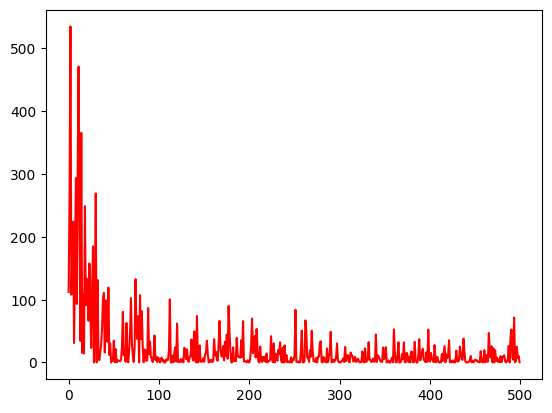

In [34]:
bgd_thetas, losses = stochastic_gradient_descent(X_b=X_b, y=y, n_epochs=50, learning_rate=0.01)

# in loss cho 500 sample đầu
x_axis = list(range(500))
plt.plot(x_axis,losses[:500], color="r")
plt.show()